In [1]:
# 5G Network Slicing Dataset - Exploratory Data Analysis
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("5G Network Slicing Dataset - Comprehensive EDA")
print("=" * 50)

5G Network Slicing Dataset - Comprehensive EDA


In [5]:
# 1. Load and Basic Inspection
print("STEP 1: Loading and Basic Data Inspection")

# Load the dataset
df = pd.read_csv(r'D:\Academics\SEM-5\Machine Learning\ML_courseproj\nr_dataset_full.csv')

# Basic information
print(f"Dataset Shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

# Data types and basic info
print("\nData Types and Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

STEP 1: Loading and Basic Data Inspection
Dataset Shape: (108000, 41)
Number of records: 108000
Number of features: 41

First 5 rows:


,episode_id,step_id,timestamp,time_hour,is_peak_hour,gnb_id,ue_id,slice_type,ue_position_x,ue_position_y,...,qos_violated,sla_met,network_utilization,total_active_users,embb_utilization,urllc_utilization,mmtc_utilization,step_reward,cumulative_reward,done
0,0,0,0.0,0,0,2,2,1,0.00,0.00,...,0,1,0.47,170,0.28,0.09,0.09,1.00,1.00,0
1,0,0,0.0,0,0,1,69,2,0.00,0.00,...,1,0,0.47,170,0.28,0.09,0.09,-10.25,-9.25,0
2,0,0,0.0,0,0,2,78,3,0.00,0.00,...,0,1,0.47,170,0.28,0.09,0.09,1.00,-8.25,0
3,0,1,10.0,0,0,1,28,1,-2.13,5.03,...,0,1,0.58,170,0.35,0.12,0.12,1.00,-7.25,0
4,0,1,10.0,0,0,1,63,2,100.00,0.00,...,1,0,0.58,170,0.35,0.12,0.12,-10.25,-17.50,0



Data Types and Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108000 entries, 0 to 107999
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   episode_id                108000 non-null  int64  
 1   step_id                   108000 non-null  int64  
 2   timestamp                 108000 non-null  float64
 3   time_hour                 108000 non-null  int64  
 4   is_peak_hour              108000 non-null  int64  
 5   gnb_id                    108000 non-null  int64  
 6   ue_id                     108000 non-null  int64  
 7   slice_type                108000 non-null  int64  
 8   ue_position_x             108000 non-null  float64
 9   ue_position_y             108000 non-null  float64
 10  distance_to_gnb           108000 non-null  float64
 11  sinr_db                   108000 non-null  float64
 12  rsrp_dbm                  108000 non-null  float64
 13  rsrq_db               

In [6]:
print("📈 STEP 2: Basic Statistical Summary")

# Numerical columns statistics
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Basic Statistics for Numerical Columns:")
display(df[numerical_cols].describe())

# Categorical columns info
categorical_cols = ['slice_type', 'is_peak_hour', 'qos_violated', 'sla_met', 'done']
print("\nCategorical Variables Summary:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())

📈 STEP 2: Basic Statistical Summary
Basic Statistics for Numerical Columns:


,episode_id,step_id,timestamp,time_hour,is_peak_hour,gnb_id,ue_id,slice_type,ue_position_x,ue_position_y,...,qos_violated,sla_met,network_utilization,total_active_users,embb_utilization,urllc_utilization,mmtc_utilization,step_reward,cumulative_reward,done
count,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.0000,1.080000e+05,108000.000000,...,108000.000000,108000.000000,108000.000000,108000.0,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000,108000.000000
mean,49.500000,179.500000,179995.000000,11.100000,0.320000,0.975407,67.785102,2.0000,6.000487e+05,64.621201,...,0.186454,0.813546,0.595778,170.0,0.357472,0.119151,0.119151,-1.022817,-552.741465,0.002778
std,28.866204,103.923129,103923.529543,7.063318,0.466478,0.811556,43.638238,0.8165,1.039178e+06,139.400110,...,0.389474,0.389474,0.150894,0.0,0.090590,0.030419,0.030419,4.283461,328.358621,0.052632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0000,-9.998000e+01,-100.000000,...,0.000000,0.000000,0.400000,170.0,0.240000,0.080000,0.080000,-10.250000,-1369.750000,0.000000
25%,24.750000,89.750000,89997.500000,5.000000,0.000000,0.000000,37.000000,1.0000,0.000000e+00,0.000000,...,0.000000,1.000000,0.470000,170.0,0.280000,0.090000,0.090000,1.000000,-820.812500,0.000000
50%,49.500000,179.500000,179995.000000,11.000000,0.000000,1.000000,60.000000,2.0000,1.591500e+02,0.000000,...,0.000000,1.000000,0.550000,170.0,0.330000,0.110000,0.110000,1.000000,-540.500000,0.000000
75%,74.250000,269.250000,269992.500000,17.000000,1.000000,2.000000,95.000000,3.0000,8.999250e+05,35.172500,...,0.000000,1.000000,0.740000,170.0,0.450000,0.150000,0.150000,1.000000,-273.500000,0.000000
max,99.000000,359.000000,359990.000000,23.000000,1.000000,2.000000,169.000000,3.0000,3.599900e+06,532.960000,...,1.000000,1.000000,0.900000,170.0,0.540000,0.180000,0.180000,1.000000,22.000000,1.000000



Categorical Variables Summary:

slice_type:
slice_type
1    36000
2    36000
3    36000
Name: count, dtype: int64

is_peak_hour:
is_peak_hour
0    73440
1    34560
Name: count, dtype: int64

qos_violated:
qos_violated
0    87863
1    20137
Name: count, dtype: int64

sla_met:
sla_met
1    87863
0    20137
Name: count, dtype: int64

done:
done
0    107700
1       300
Name: count, dtype: int64


📡 STEP 3: Network Slice Analysis


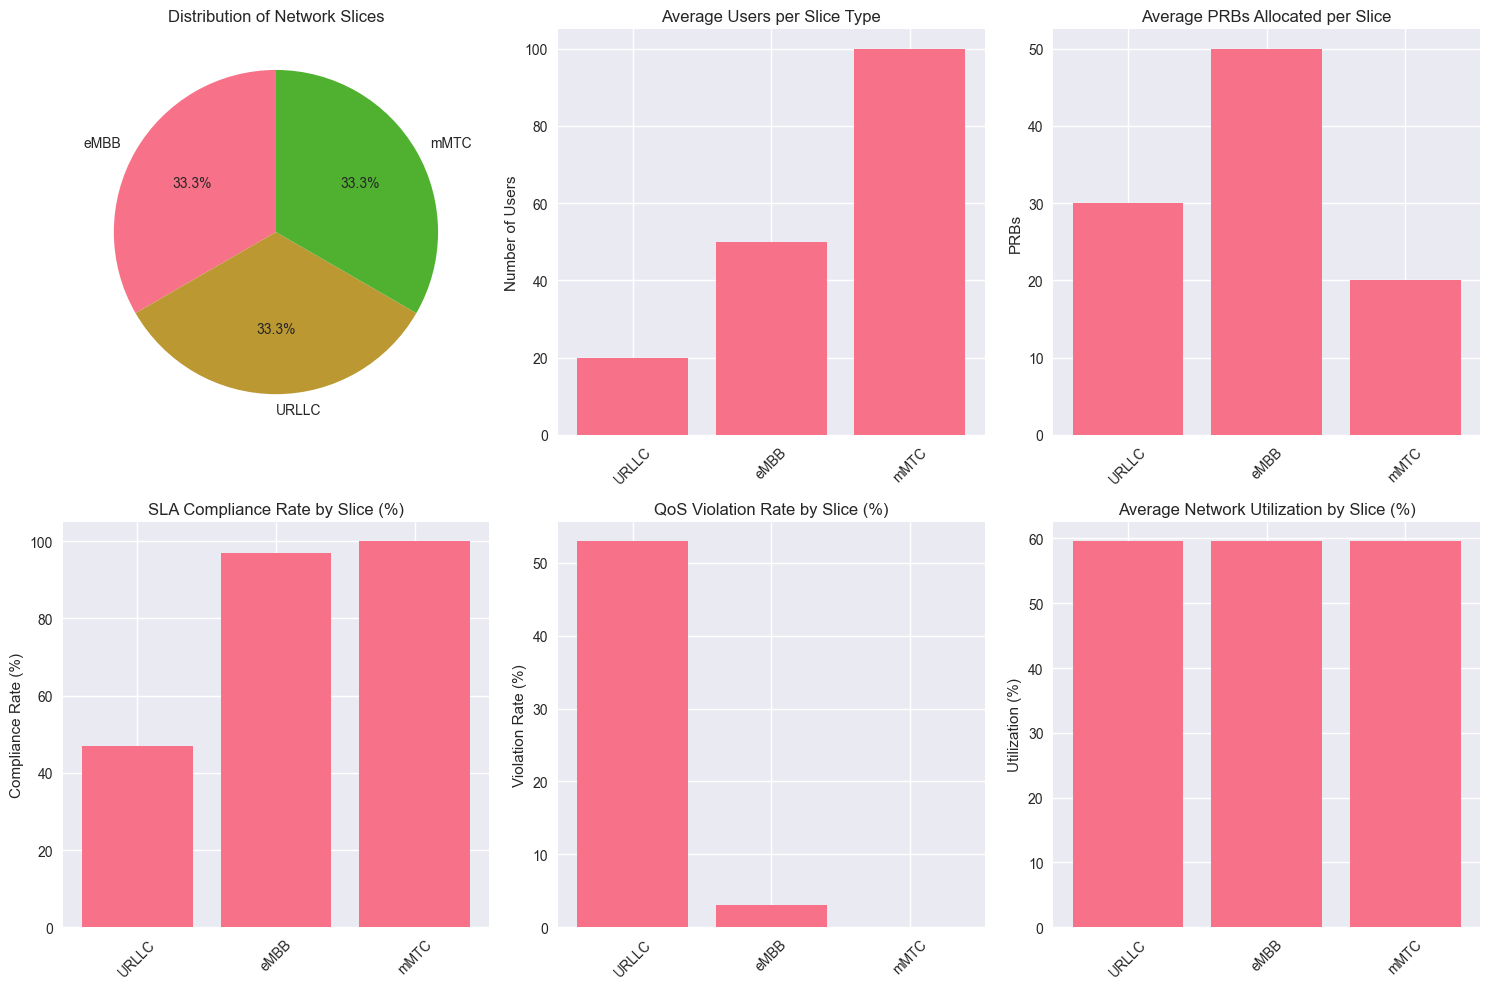

In [7]:
print("📡 STEP 3: Network Slice Analysis")

# Map slice types to meaningful names
slice_map = {1: 'eMBB', 2: 'URLLC', 3: 'mMTC'}
df['slice_name'] = df['slice_type'].map(slice_map)

# Slice distribution
plt.figure(figsize=(15, 10))

# Subplot 1: Slice type distribution
plt.subplot(2, 3, 1)
slice_counts = df['slice_name'].value_counts()
plt.pie(slice_counts.values, labels=slice_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Network Slices')

# Subplot 2: Users per slice type
plt.subplot(2, 3, 2)
slice_users = df.groupby('slice_name')['num_users'].mean()
plt.bar(slice_users.index, slice_users.values)
plt.title('Average Users per Slice Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

# Subplot 3: Resource allocation by slice
plt.subplot(2, 3, 3)
slice_resources = df.groupby('slice_name')['allocated_prbs'].mean()
plt.bar(slice_resources.index, slice_resources.values)
plt.title('Average PRBs Allocated per Slice')
plt.ylabel('PRBs')
plt.xticks(rotation=45)

# Subplot 4: SLA compliance by slice
plt.subplot(2, 3, 4)
sla_compliance = df.groupby('slice_name')['sla_met'].mean() * 100
plt.bar(sla_compliance.index, sla_compliance.values)
plt.title('SLA Compliance Rate by Slice (%)')
plt.ylabel('Compliance Rate (%)')
plt.xticks(rotation=45)

# Subplot 5: QoS violations by slice
plt.subplot(2, 3, 5)
qos_violations = df.groupby('slice_name')['qos_violated'].mean() * 100
plt.bar(qos_violations.index, qos_violations.values)
plt.title('QoS Violation Rate by Slice (%)')
plt.ylabel('Violation Rate (%)')
plt.xticks(rotation=45)

# Subplot 6: Network utilization by slice
plt.subplot(2, 3, 6)
utilization = df.groupby('slice_name')['network_utilization'].mean() * 100
plt.bar(utilization.index, utilization.values)
plt.title('Average Network Utilization by Slice (%)')
plt.ylabel('Utilization (%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

 STEP 4: Radio Performance Analysis


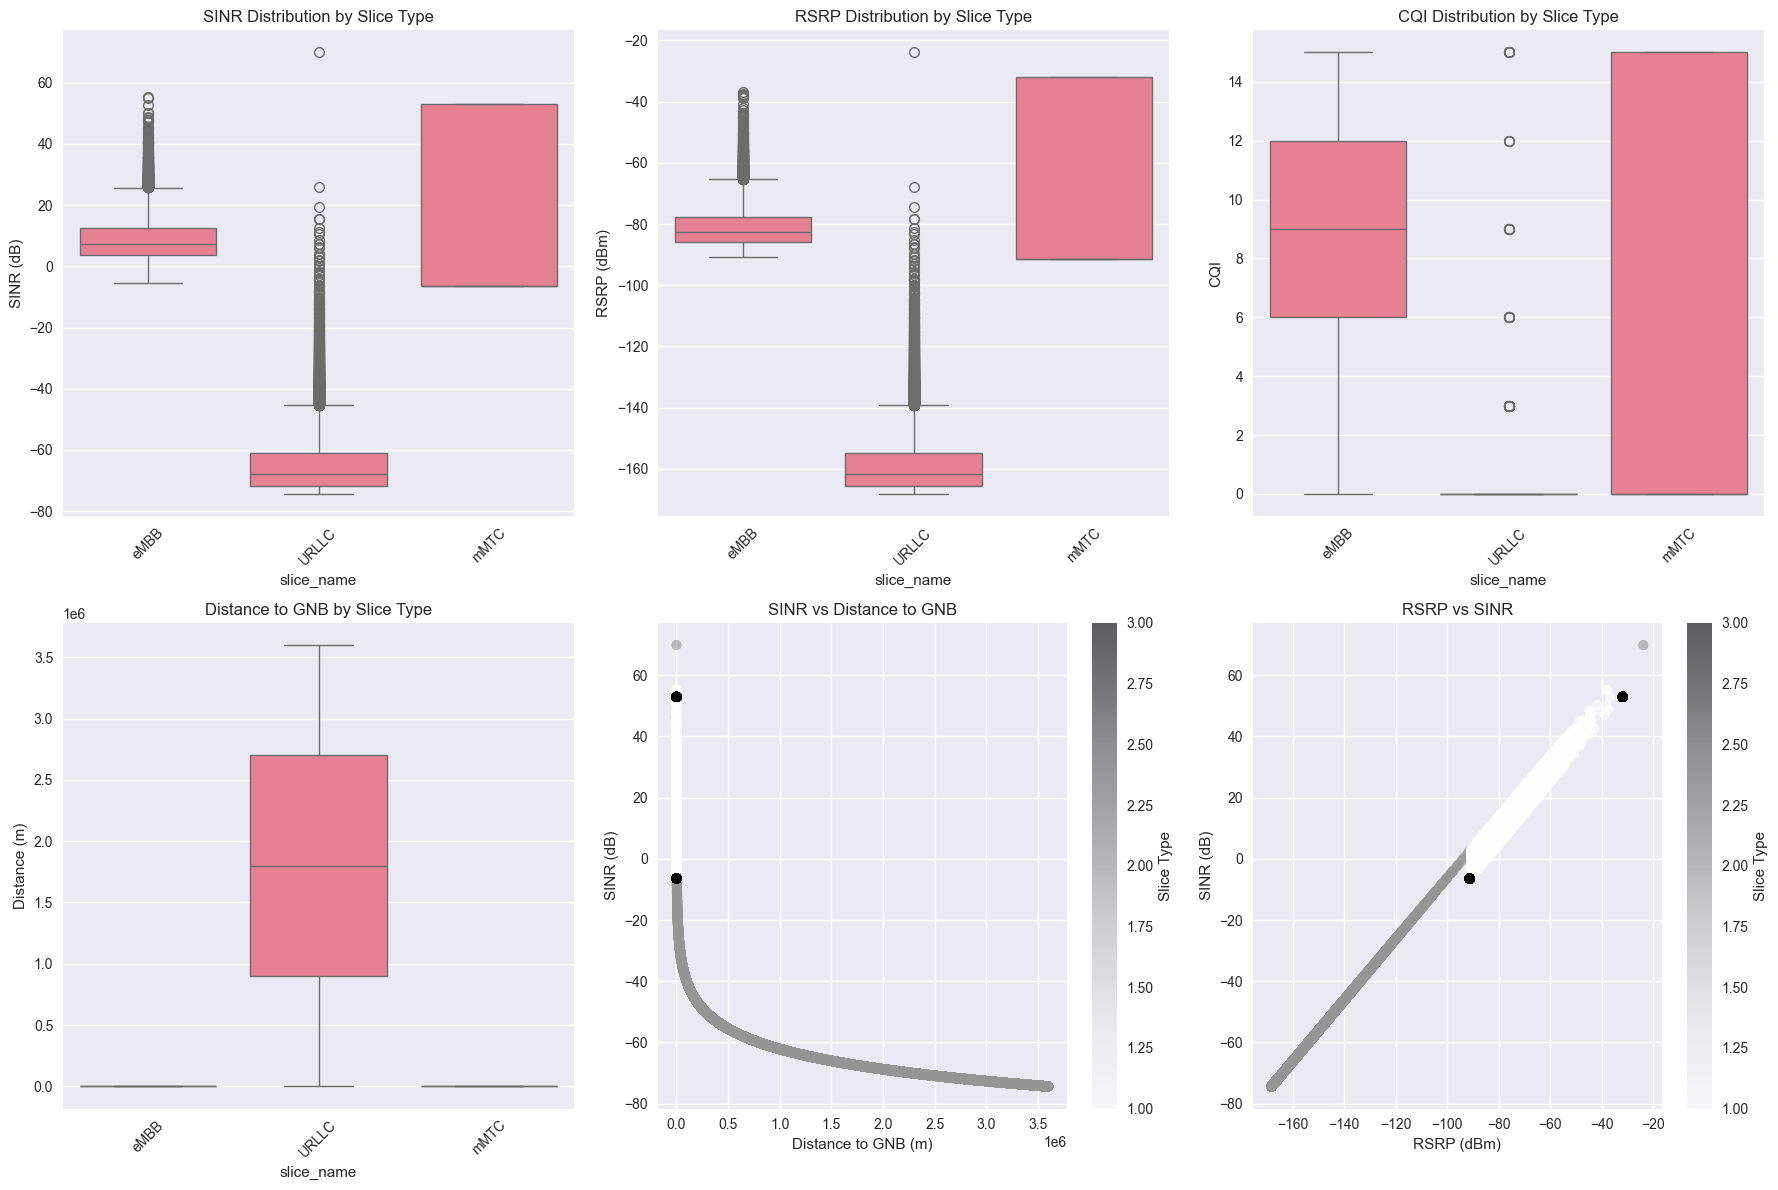

In [8]:
print(" STEP 4: Radio Performance Analysis")

plt.figure(figsize=(18, 12))

# Subplot 1: SINR distribution by slice
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='slice_name', y='sinr_db')
plt.title('SINR Distribution by Slice Type')
plt.ylabel('SINR (dB)')
plt.xticks(rotation=45)

# Subplot 2: RSRP distribution
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='slice_name', y='rsrp_dbm')
plt.title('RSRP Distribution by Slice Type')
plt.ylabel('RSRP (dBm)')
plt.xticks(rotation=45)

# Subplot 3: CQI distribution
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='slice_name', y='cqi')
plt.title('CQI Distribution by Slice Type')
plt.ylabel('CQI')
plt.xticks(rotation=45)

# Subplot 4: Distance to GNB distribution
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='slice_name', y='distance_to_gnb')
plt.title('Distance to GNB by Slice Type')
plt.ylabel('Distance (m)')
plt.xticks(rotation=45)

# Subplot 5: SINR vs Distance scatter
plt.subplot(2, 3, 5)
scatter = plt.scatter(df['distance_to_gnb'], df['sinr_db'], c=df['slice_type'], alpha=0.6)
plt.colorbar(scatter, label='Slice Type')
plt.xlabel('Distance to GNB (m)')
plt.ylabel('SINR (dB)')
plt.title('SINR vs Distance to GNB')

# Subplot 6: RSRP vs SINR correlation
plt.subplot(2, 3, 6)
plt.scatter(df['rsrp_dbm'], df['sinr_db'], c=df['slice_type'], alpha=0.6)
plt.colorbar(label='Slice Type')
plt.xlabel('RSRP (dBm)')
plt.ylabel('SINR (dB)')
plt.title('RSRP vs SINR')

plt.tight_layout()
plt.show()

⚡ STEP 5: QoS and Performance Metrics Analysis


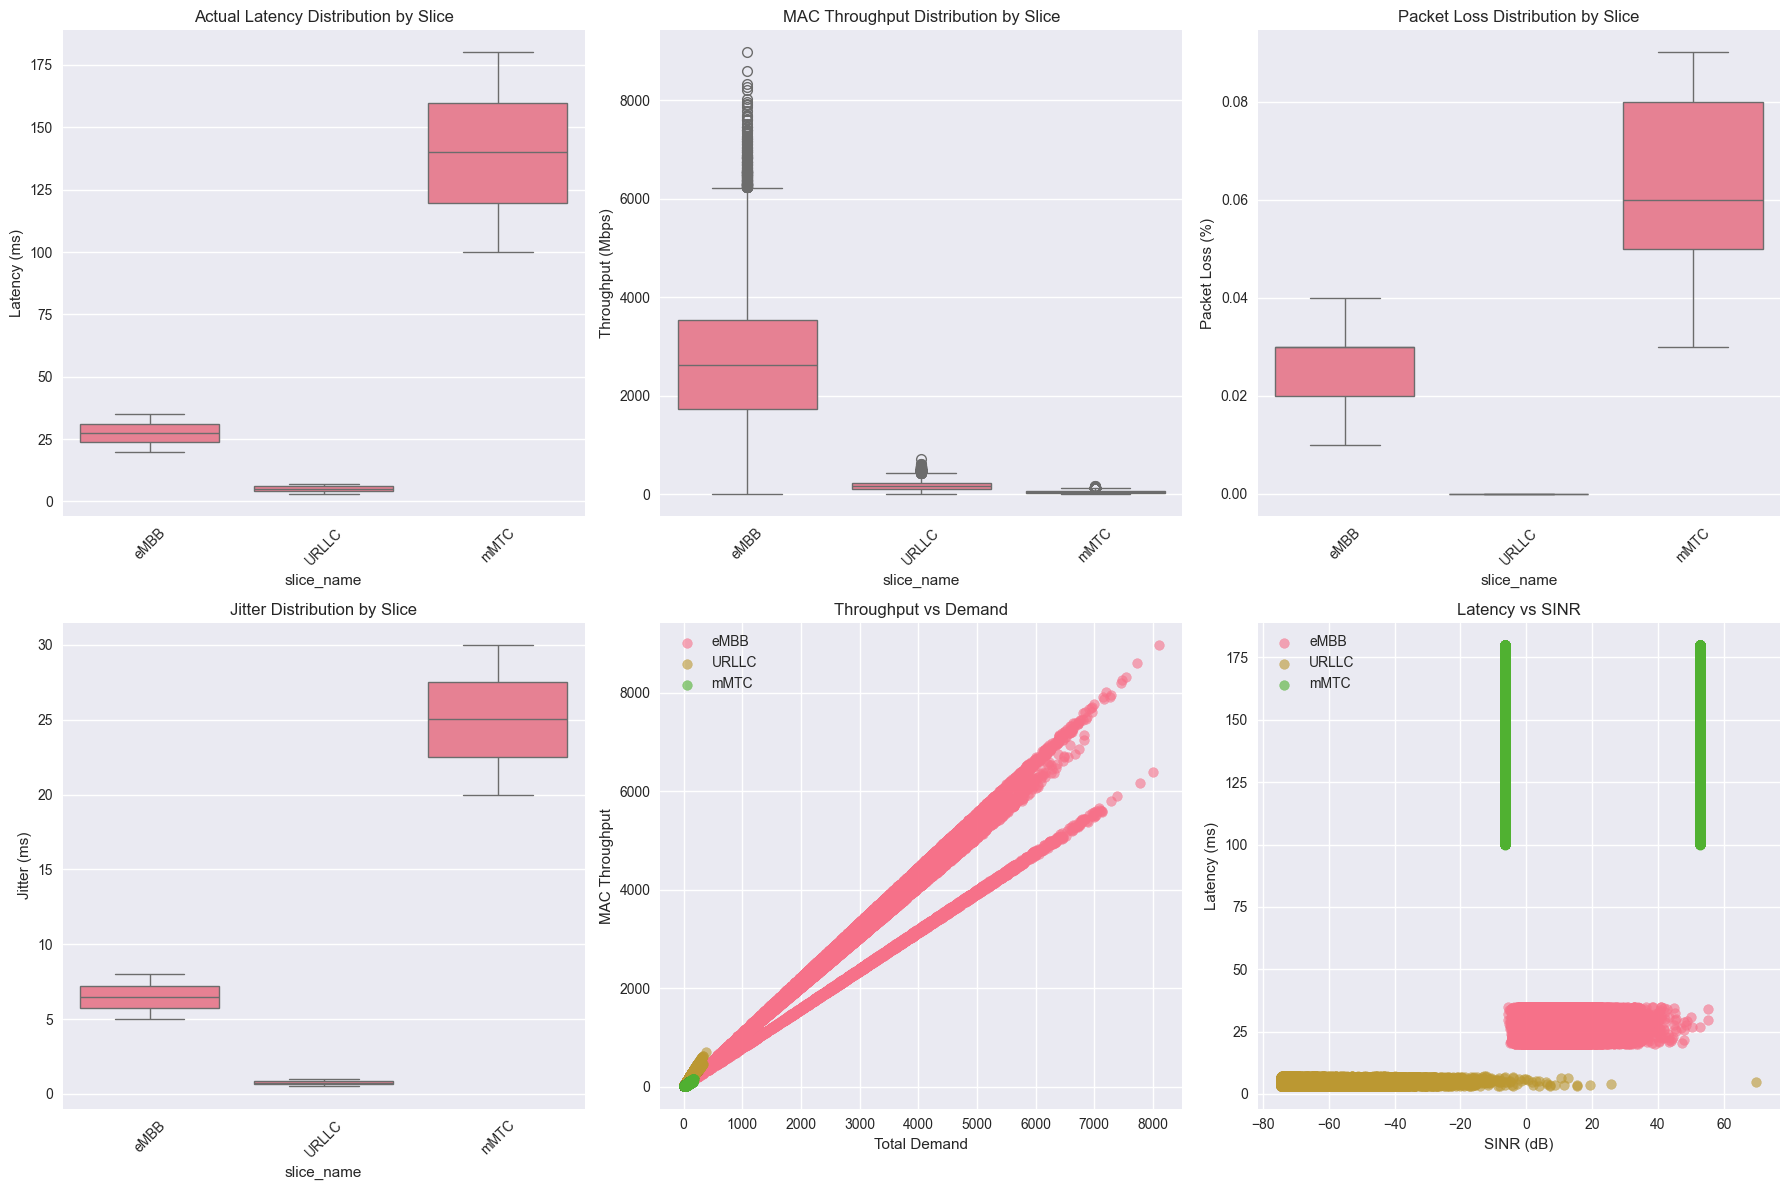

In [9]:
print("⚡ STEP 5: QoS and Performance Metrics Analysis")

plt.figure(figsize=(18, 12))

# Subplot 1: Latency distribution
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x='slice_name', y='actual_latency_ms')
plt.title('Actual Latency Distribution by Slice')
plt.ylabel('Latency (ms)')
plt.xticks(rotation=45)

# Subplot 2: Throughput distribution
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x='slice_name', y='mac_throughput')
plt.title('MAC Throughput Distribution by Slice')
plt.ylabel('Throughput (Mbps)')
plt.xticks(rotation=45)

# Subplot 3: Packet loss distribution
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='slice_name', y='packet_loss_percent')
plt.title('Packet Loss Distribution by Slice')
plt.ylabel('Packet Loss (%)')
plt.xticks(rotation=45)

# Subplot 4: Jitter distribution
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='slice_name', y='jitter_ms')
plt.title('Jitter Distribution by Slice')
plt.ylabel('Jitter (ms)')
plt.xticks(rotation=45)

# Subplot 5: Throughput vs Demand
plt.subplot(2, 3, 5)
for slice_type in df['slice_name'].unique():
    slice_data = df[df['slice_name'] == slice_type]
    plt.scatter(slice_data['total_demand'], slice_data['mac_throughput'], 
               label=slice_type, alpha=0.6)
plt.xlabel('Total Demand')
plt.ylabel('MAC Throughput')
plt.title('Throughput vs Demand')
plt.legend()

# Subplot 6: Latency vs SINR
plt.subplot(2, 3, 6)
for slice_type in df['slice_name'].unique():
    slice_data = df[df['slice_name'] == slice_type]
    plt.scatter(slice_data['sinr_db'], slice_data['actual_latency_ms'], 
               label=slice_type, alpha=0.6)
plt.xlabel('SINR (dB)')
plt.ylabel('Latency (ms)')
plt.title('Latency vs SINR')
plt.legend()

plt.tight_layout()
plt.show()

STEP 6: Temporal Analysis
----------------------------------------


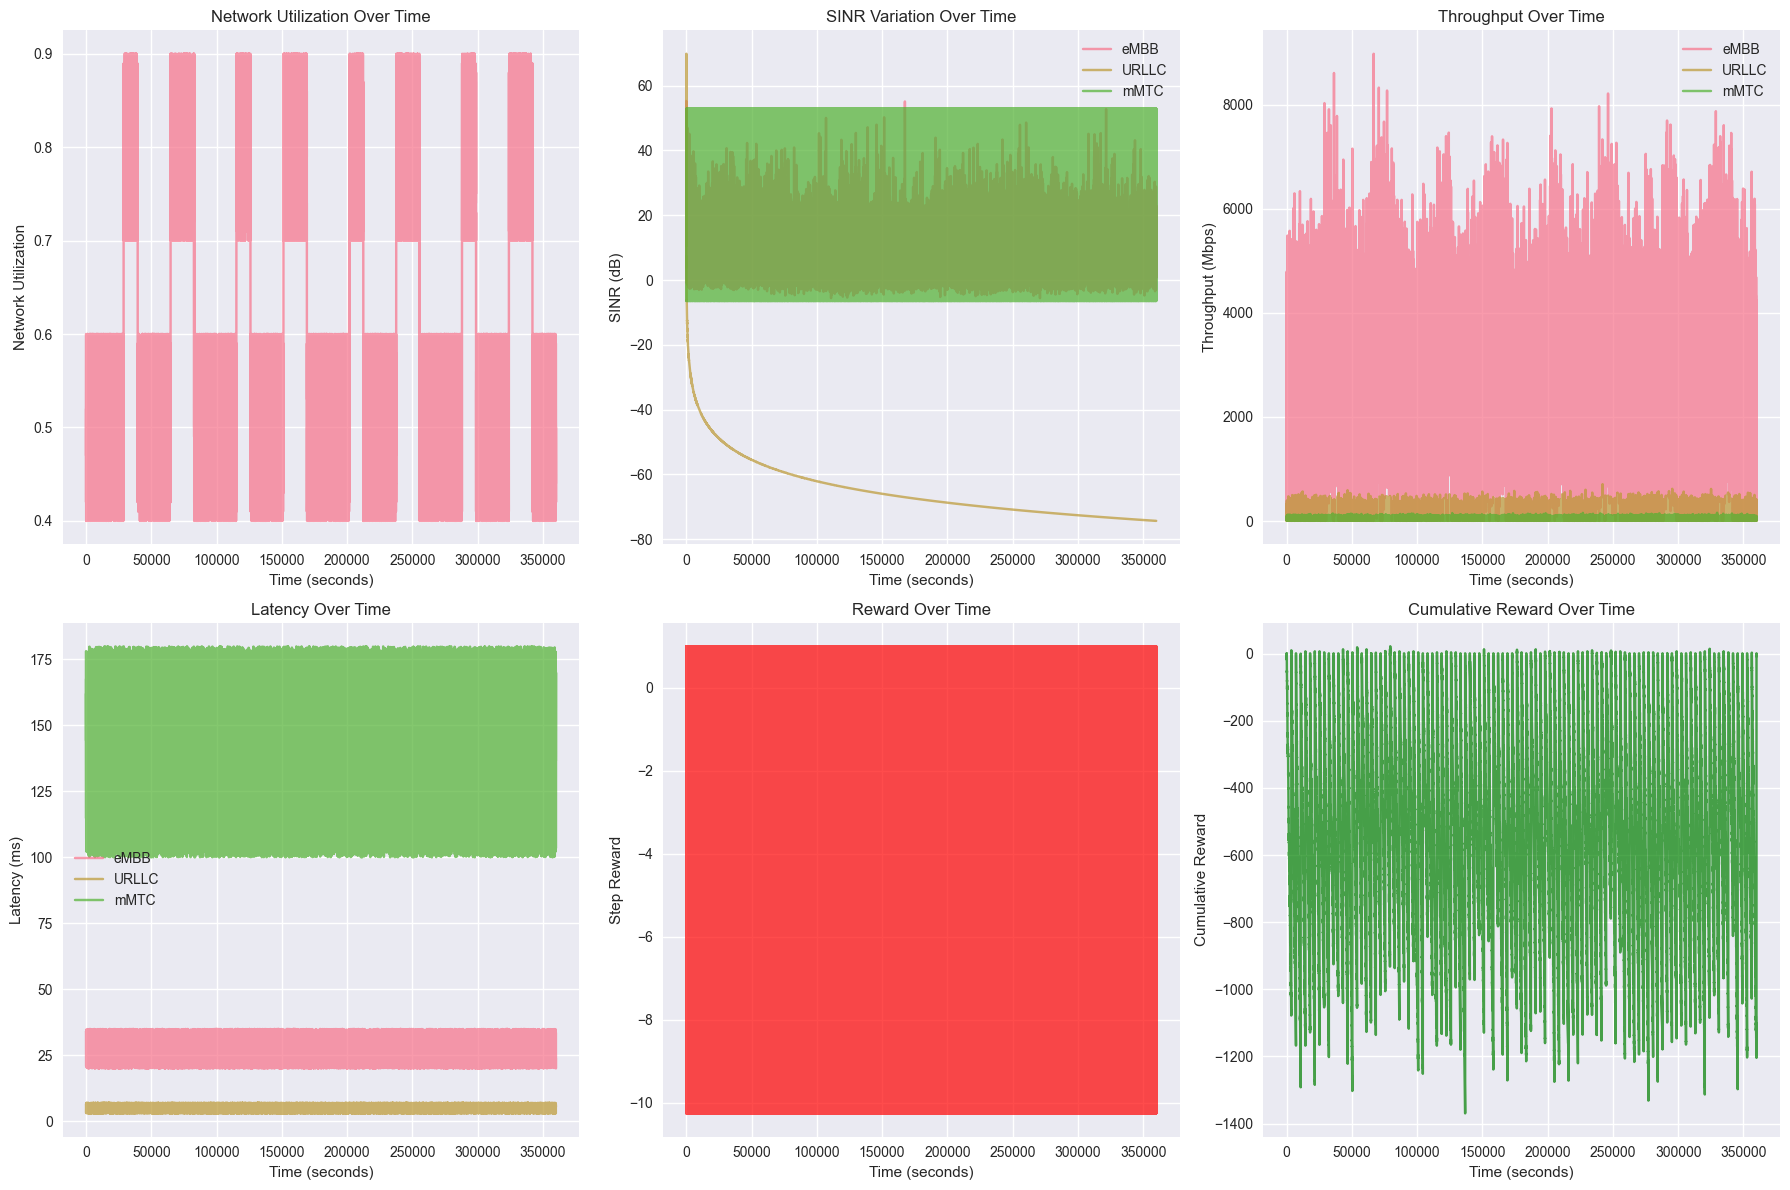

In [10]:
print("STEP 6: Temporal Analysis")
print("-" * 40)

plt.figure(figsize=(18, 12))

# Subplot 1: Network utilization over time
plt.subplot(2, 3, 1)
plt.plot(df['timestamp'], df['network_utilization'], alpha=0.7)
plt.xlabel('Time (seconds)')
plt.ylabel('Network Utilization')
plt.title('Network Utilization Over Time')

# Subplot 2: SINR variation over time
plt.subplot(2, 3, 2)
for slice_type in df['slice_name'].unique():
    slice_data = df[df['slice_name'] == slice_type]
    plt.plot(slice_data['timestamp'], slice_data['sinr_db'], 
             label=slice_type, alpha=0.7)
plt.xlabel('Time (seconds)')
plt.ylabel('SINR (dB)')
plt.title('SINR Variation Over Time')
plt.legend()

# Subplot 3: Throughput over time
plt.subplot(2, 3, 3)
for slice_type in df['slice_name'].unique():
    slice_data = df[df['slice_name'] == slice_type]
    plt.plot(slice_data['timestamp'], slice_data['mac_throughput'], 
             label=slice_type, alpha=0.7)
plt.xlabel('Time (seconds)')
plt.ylabel('Throughput (Mbps)')
plt.title('Throughput Over Time')
plt.legend()

# Subplot 4: Latency over time
plt.subplot(2, 3, 4)
for slice_type in df['slice_name'].unique():
    slice_data = df[df['slice_name'] == slice_type]
    plt.plot(slice_data['timestamp'], slice_data['actual_latency_ms'], 
             label=slice_type, alpha=0.7)
plt.xlabel('Time (seconds)')
plt.ylabel('Latency (ms)')
plt.title('Latency Over Time')
plt.legend()

# Subplot 5: Reward over time
plt.subplot(2, 3, 5)
plt.plot(df['timestamp'], df['step_reward'], alpha=0.7, color='red')
plt.xlabel('Time (seconds)')
plt.ylabel('Step Reward')
plt.title('Reward Over Time')

# Subplot 6: Cumulative reward
plt.subplot(2, 3, 6)
plt.plot(df['timestamp'], df['cumulative_reward'], alpha=0.7, color='green')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Time')

plt.tight_layout()
plt.show()

🔗 STEP 7: Correlation Analysis


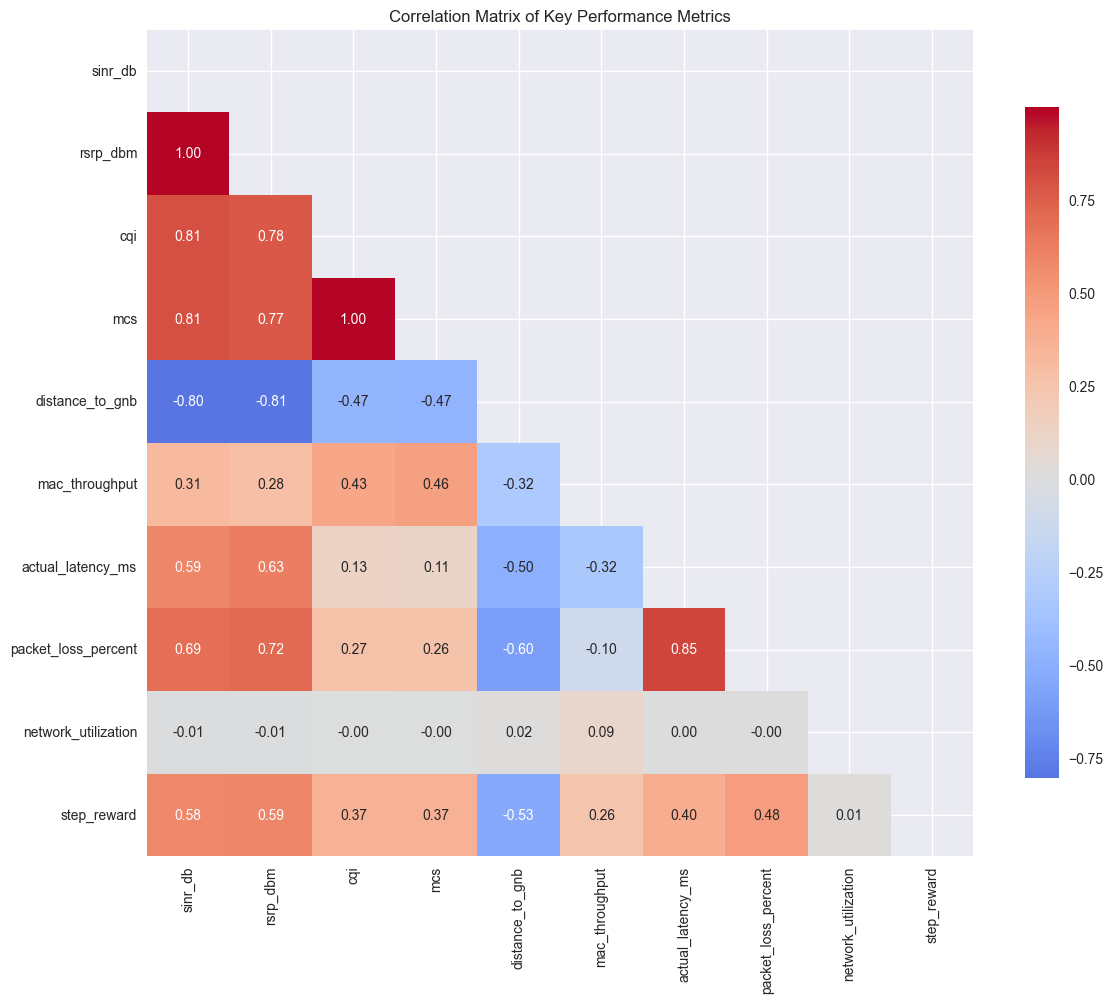

ValueError: could not convert string to float: 'eMBB'

In [11]:
print("🔗 STEP 7: Correlation Analysis")

# Select key performance metrics for correlation
correlation_cols = [
    'sinr_db', 'rsrp_dbm', 'cqi', 'mcs', 'distance_to_gnb',
    'mac_throughput', 'actual_latency_ms', 'packet_loss_percent',
    'network_utilization', 'step_reward'
]

# Filter columns that exist in dataframe
correlation_cols = [col for col in correlation_cols if col in df.columns]

plt.figure(figsize=(12, 10))
corr_matrix = df[correlation_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Key Performance Metrics')
plt.tight_layout()
plt.show()

# Top correlations with reward
if 'step_reward' in df.columns:
    reward_corr = df.corr()['step_reward'].sort_values(ascending=False)
    print("\nTop correlations with step_reward:")
    print(reward_corr.head(10))

STEP 8: GNB and UE Analysis


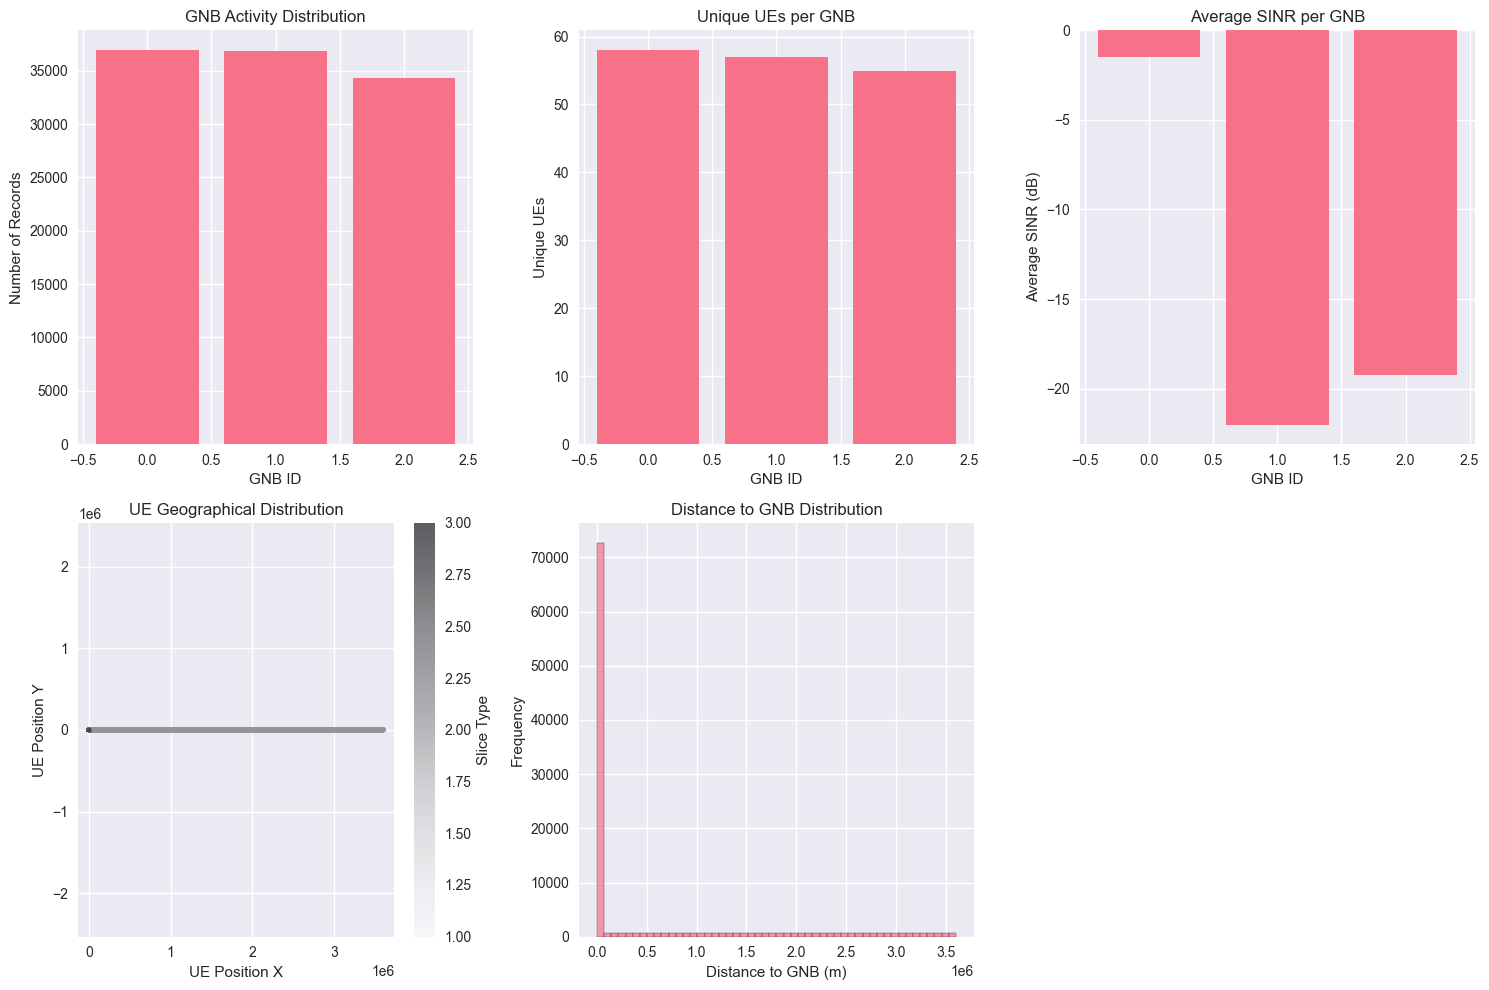

In [12]:
print("STEP 8: GNB and UE Analysis")

plt.figure(figsize=(15, 10))

# Subplot 1: GNB distribution
plt.subplot(2, 3, 1)
gnb_counts = df['gnb_id'].value_counts().sort_index()
plt.bar(gnb_counts.index, gnb_counts.values)
plt.xlabel('GNB ID')
plt.ylabel('Number of Records')
plt.title('GNB Activity Distribution')

# Subplot 2: UE distribution across GNB
plt.subplot(2, 3, 2)
ue_per_gnb = df.groupby('gnb_id')['ue_id'].nunique()
plt.bar(ue_per_gnb.index, ue_per_gnb.values)
plt.xlabel('GNB ID')
plt.ylabel('Unique UEs')
plt.title('Unique UEs per GNB')

# Subplot 3: Average SINR per GNB
plt.subplot(2, 3, 3)
sinr_per_gnb = df.groupby('gnb_id')['sinr_db'].mean()
plt.bar(sinr_per_gnb.index, sinr_per_gnb.values)
plt.xlabel('GNB ID')
plt.ylabel('Average SINR (dB)')
plt.title('Average SINR per GNB')

# Subplot 4: UE position scatter plot
plt.subplot(2, 3, 4)
scatter = plt.scatter(df['ue_position_x'], df['ue_position_y'], 
                     c=df['slice_type'], alpha=0.6, s=10)
plt.colorbar(scatter, label='Slice Type')
plt.xlabel('UE Position X')
plt.ylabel('UE Position Y')
plt.title('UE Geographical Distribution')
plt.axis('equal')

# Subplot 5: Distance distribution
plt.subplot(2, 3, 5)
plt.hist(df['distance_to_gnb'], bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Distance to GNB (m)')
plt.ylabel('Frequency')
plt.title('Distance to GNB Distribution')

plt.tight_layout()
plt.show()

In [13]:
print("STEP 9: Advanced Analytics")
print("-" * 40)

# QoS Violation Analysis
print("QoS Violation Analysis:")
qos_summary = df.groupby('slice_name').agg({
    'qos_violated': ['mean', 'sum'],
    'sla_met': 'mean',
    'packet_loss_percent': 'mean',
    'actual_latency_ms': 'mean'
}).round(3)

qos_summary.columns = ['QoS_Violation_Rate', 'QoS_Violation_Count', 
                      'SLA_Compliance_Rate', 'Avg_Packet_Loss', 'Avg_Latency']
display(qos_summary)

# Performance by time hour
print("\nPerformance by Time Hour:")
if 'time_hour' in df.columns:
    hour_performance = df.groupby('time_hour').agg({
        'network_utilization': 'mean',
        'step_reward': 'mean',
        'qos_violated': 'mean'
    }).round(3)
    display(hour_performance)

STEP 9: Advanced Analytics
----------------------------------------
QoS Violation Analysis:


,QoS_Violation_Rate,QoS_Violation_Count,SLA_Compliance_Rate,Avg_Packet_Loss,Avg_Latency
slice_name,,,,,
URLLC,0.529,19061,0.471,0.000,4.997
eMBB,0.030,1076,0.970,0.025,27.469
mMTC,0.000,0,1.000,0.060,139.972



Performance by Time Hour:


,network_utilization,step_reward,qos_violated
time_hour,,,
0,0.498,-0.980,0.186
1,0.500,-1.090,0.195
2,0.504,-1.041,0.191
3,0.499,-1.092,0.196
4,0.501,-1.110,0.196
5,0.503,-1.017,0.188
6,0.500,-1.066,0.191
7,0.499,-0.989,0.186
8,0.799,-1.091,0.187


In [15]:
print(" STEP 10: Key Insights Summary")
print("-" * 40)

print("DATASET OVERVIEW:")
print(f"• Total records: {df.shape[0]:,}")
print(f"• Time duration: {df['timestamp'].max():.0f} seconds ({df['timestamp'].max()/3600:.1f} hours)")
print(f"• Number of GNB stations: {df['gnb_id'].nunique()}")
print(f"• Number of UEs: {df['ue_id'].nunique()}")

print("\nSLICE PERFORMANCE SUMMARY:")
slice_summary = df.groupby('slice_name').agg({
    'sinr_db': 'mean',
    'mac_throughput': 'mean',
    'actual_latency_ms': 'mean',
    'packet_loss_percent': 'mean',
    'sla_met': 'mean'
}).round(2)

display(slice_summary)

print("\nKEY OBSERVATIONS:")
print(f"• Overall SLA compliance rate: {df['sla_met'].mean()*100:.1f}%")
print(f"• Overall QoS violation rate: {df['qos_violated'].mean()*100:.1f}%")
print(f"• Average network utilization: {df['network_utilization'].mean()*100:.1f}%")
print(f"• Average SINR: {df['sinr_db'].mean():.1f} dB")

# Identify potential issues
if 'step_reward' in df.columns:
    negative_rewards = (df['step_reward'] < 0).sum()
    print(f"• Steps with negative rewards: {negative_rewards} ({negative_rewards/len(df)*100:.1f}%)")

 STEP 10: Key Insights Summary
----------------------------------------
DATASET OVERVIEW:
• Total records: 108,000
• Time duration: 359990 seconds (100.0 hours)
• Number of GNB stations: 3
• Number of UEs: 170

SLICE PERFORMANCE SUMMARY:


,sinr_db,mac_throughput,actual_latency_ms,packet_loss_percent,sla_met
slice_name,,,,,
URLLC,-64.81,168.76,5.00,0.00,0.47
eMBB,8.68,2656.81,27.47,0.03,0.97
mMTC,13.76,45.70,139.97,0.06,1.00



KEY OBSERVATIONS:
• Overall SLA compliance rate: 81.4%
• Overall QoS violation rate: 18.6%
• Average network utilization: 59.6%
• Average SINR: -14.1 dB
• Steps with negative rewards: 20137 (18.6%)


In [16]:
print("Exporting Summary Statistics")

# Create comprehensive summary
summary_stats = {
    'Dataset_Records': df.shape[0],
    'Dataset_Features': df.shape[1],
    'Time_Duration_Seconds': df['timestamp'].max(),
    'Unique_GNBs': df['gnb_id'].nunique(),
    'Unique_UEs': df['ue_id'].nunique(),
    'Overall_SLA_Compliance': df['sla_met'].mean(),
    'Overall_QoS_Violation': df['qos_violated'].mean(),
    'Avg_Network_Utilization': df['network_utilization'].mean(),
    'Avg_SINR_dB': df['sinr_db'].mean()
}

# Convert to DataFrame for better display
summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
display(summary_df)

print("EDA Complete! The dataset has been thoroughly analyzed.")

Exporting Summary Statistics


,Metric,Value
0,Dataset_Records,108000.000000
1,Dataset_Features,42.000000
2,Time_Duration_Seconds,359990.000000
3,Unique_GNBs,3.000000
4,Unique_UEs,170.000000
5,Overall_SLA_Compliance,0.813546
6,Overall_QoS_Violation,0.186454
7,Avg_Network_Utilization,0.595778
8,Avg_SINR_dB,-14.124445


EDA Complete! The dataset has been thoroughly analyzed.
